# TP Clustering

2319.5021118
1683.99165988
1571.88040561
1561.3982005
1559.08926853
1558.78964642
1558.70613882
Converged !


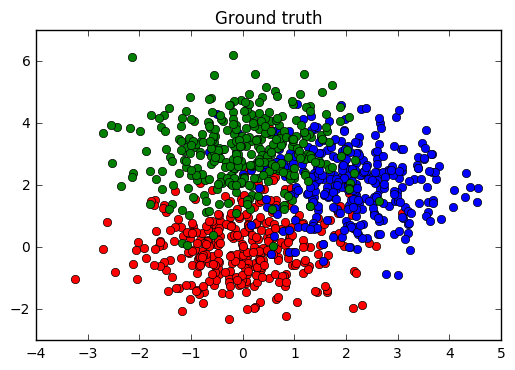

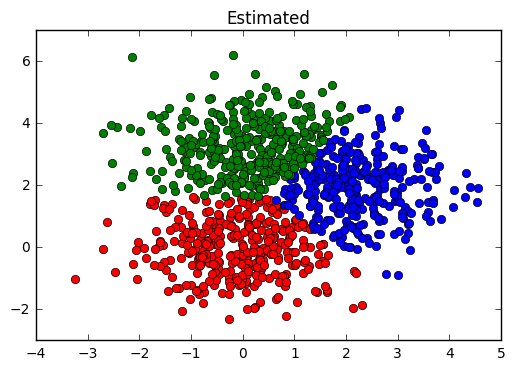

In [48]:
import numpy as np
from scipy import spatial
def generate_data(n, centroids, sigma=1., random_state=42):
    """Generate sample data
    Parameters
    ----------
    n : int
        The number of samples
    centroids : array, shape=(k, p)
        The centroids
    sigma : float
        The standard deviation in each class
    Returns
    -------
    X : array, shape=(n, p)
        The samples
    y : array, shape=(n,)
        The labels
    """
    rng = np.random.RandomState(random_state)
    k, p = centroids.shape
    X = np.empty((n, p))
    y = np.empty(n)
    for i in range(k):
        X[i::k] = centroids[i] + sigma * rng.randn(len(X[i::k]), p)
        y[i::k] = i
    order = rng.permutation(n)
    X = X[order]
    y = y[order]
    return X, y

def compute_labels(X, centroids):
    """Compute labels
    Parameters
    ----------
    X : array, shape=(n, p)
        The samples
    Returns
    -------
    labels : array, shape=(n,)
        The labels of each sample
    """
    dist = spatial.distance.cdist(X, centroids, metric='euclidean')
    return dist.argmin(axis=1)

def compute_inertia_centroids(X, labels):
   dim_labels = np.unique(labels)# Labels différents dans la matrice des labels
   cardinal_matrix = np.zeros((len(dim_labels), 2))
   inertie_matrix = np.zeros( (len(dim_labels),1))
   # Calcul des centroids
   for i in dim_labels :
       vec = X[labels==i, :]
       cardinal = vec.shape[0]
       cardinal_matrix[i,0] = (1/ cardinal)  * np.sum(vec[:, 0])
       cardinal_matrix[i,1] = (1/ cardinal) * np.sum(vec[:, 1])
       
       inertie_matrix[i, 0] = np.linalg.norm(vec[:, 0] - cardinal_matrix[i,0], ord = 2)**2 +\
       np.linalg.norm(vec[:, 1] - cardinal_matrix[i,1], ord = 2)**2
       
   
   return inertie_matrix.sum(), cardinal_matrix

def kmeans(X, n_clusters, n_iter=100, tol=1e-7, random_state=42):
    """K-Means : Estimate position of centroids and labels
    Parameters
    ----------
    X : array, shape=(n, p)
        The samples
    n_clusters : int
        The desired number of clusters
    tol : float
        The tolerance to check convergence
    Returns
    -------
    centroids: array, shape=(k, p)
        The estimated centroids
    labels: array, shape=(n,)
        The estimated labels
    """
    # initialize centroids with random samples
    rng = np.random.RandomState(random_state)
    centroids = X[rng.permutation(len(X))[:n_clusters]]
    labels = compute_labels(X, centroids)
    old_inertia = np.inf
    for k in range(n_iter):
        inertia, centroids = compute_inertia_centroids(X, labels)
        if abs(inertia - old_inertia) < tol:
            print('Converged !')
            break
        old_inertia = inertia
        labels = compute_labels(X, centroids)
        print(inertia)
    else:
        print('Dit not converge...')
    return centroids, labels

if __name__ == '__main__':
    n = 1000
    centroids = np.array([[0., 0.], [2., 2.], [0., 3.]])
    X, y = generate_data(n, centroids)

    centroids, labels = kmeans(X, n_clusters=3, random_state=42)
    import matplotlib.pyplot as plt
    plt.close('all')
    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'or')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob')
    plt.plot(X[y == 2, 0], X[y == 2, 1], 'og')
    plt.title('Ground truth')

    plt.figure()
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'or')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'ob')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'og')
    plt.title('Estimated')
    plt.show()

Effectivement l'inertie décroit jusqu'à convergence.

3) On fait varier le random generator

2478.74020853
2324.20767213
2240.38043832
2166.66727842
1954.3798617
1662.8924878
1573.35996977
1561.40554519
1560.09393936
1559.08994329
1558.77997342
1558.7176639
Converged !


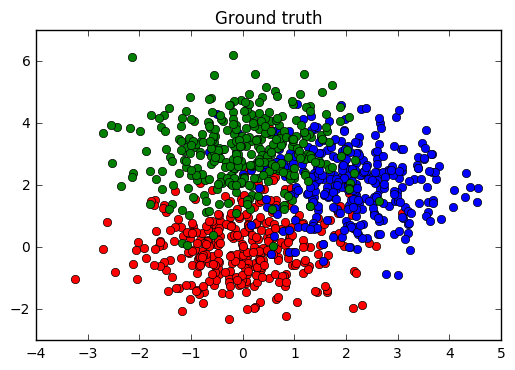

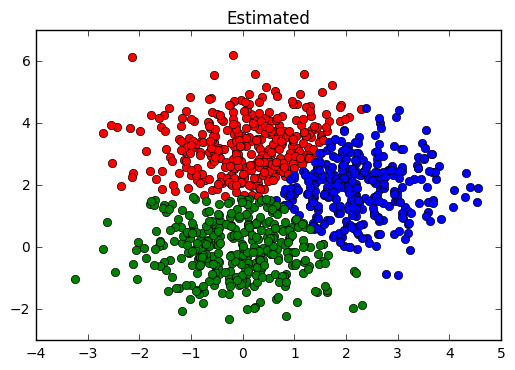

2460.75909523
1745.18547934
1577.21317651
1561.18645904
1558.96492649
1558.72156888
1558.70613882
Converged !


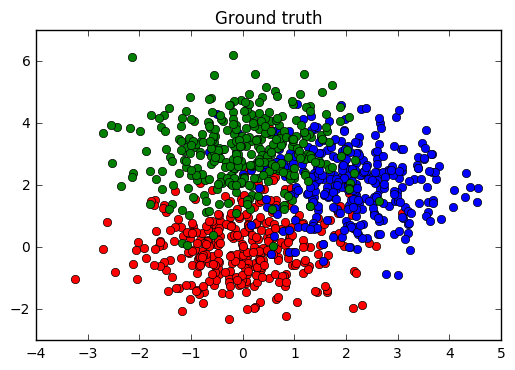

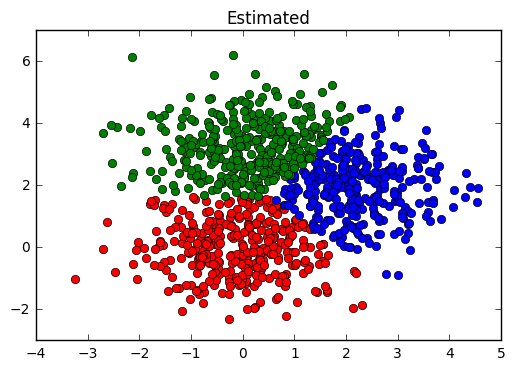

2835.11338836
1987.67314171
1682.14873579
1613.54190833
1585.64341937
1572.46756925
1566.11931526
1562.40821905
1559.78961457
1558.76774102
1558.70613882
Converged !


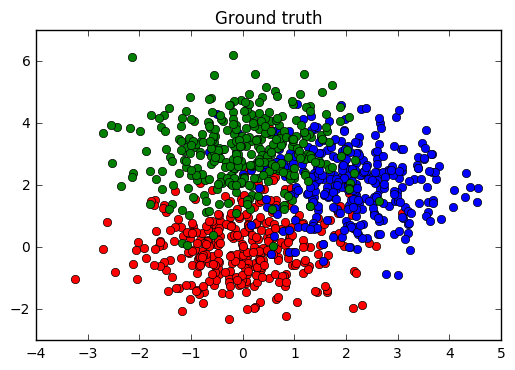

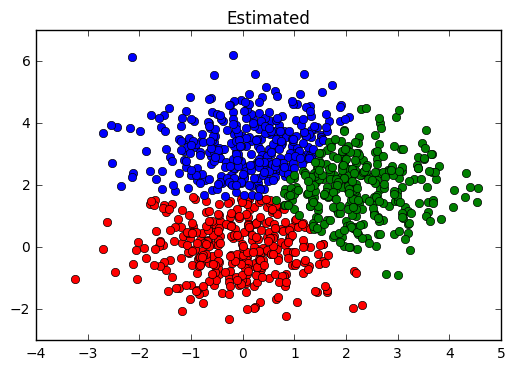

2088.62655035
1812.95843533
1670.05564145
1606.51332982
1577.76323452
1568.95291789
1565.19434025
1562.09966492
1559.50031456
1558.76774102
1558.70613882
Converged !


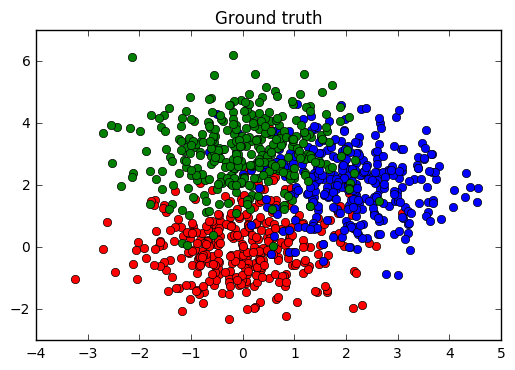

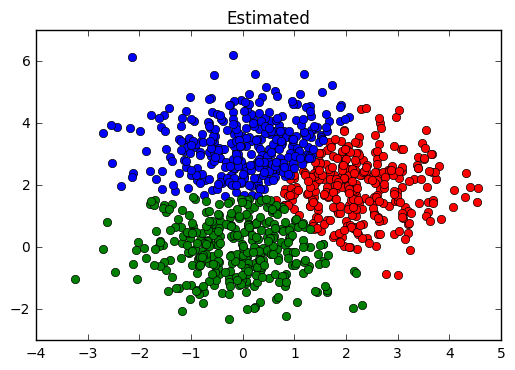

In [53]:
for _ in range (4):
    n = 1000
    centroids = np.array([[0., 0.], [2., 2.], [0., 3.]])
    X, y = generate_data(n, centroids)

    centroids, labels = kmeans(X, n_clusters=3, random_state=np.random.randint(50))
    plt.close('all')
    plt.figure()
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'or')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob')
    plt.plot(X[y == 2, 0], X[y == 2, 1], 'og')
    plt.title('Ground truth')

    plt.figure()
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'or')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'ob')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'og')
    plt.title('Estimated')
    plt.show()





On voit effectivement que le clustering et différend à chaque initialisation aléatoire

4) Comparons avec l'implémentation de Scikit Learn

In [54]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_

In [ ]:
plt.close('all')
plt.figure()
plt.plot(X[y == 0, 0], X[y == 0, 1], 'or')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob')
plt.plot(X[y == 2, 0], X[y == 2, 1], 'og')
plt.title('Ground truth')

plt.figure()
plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'or')
plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'ob')
plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'og')
plt.title('Estimated')
plt.show()